ORTHOPEDIC CLASSIFICATION


In [40]:
#Predictive Modeling for Enhanced Orthopedic Outcomes

In [41]:
import pandas as pd 
import numpy as np

In [42]:
data = pd.read_csv("C:\\Users\\neela\\OneDrive\\data\\orthopedic dataset.csv")
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
1175,74.088795,9.433234,52.585800,19.195300,134.711772,29.106575,Abnormal
1176,63.811232,21.380645,87.163863,16.158201,114.818751,26.931841,Abnormal
1177,68.384311,21.936186,61.089501,29.237841,123.932010,10.431972,Abnormal
1178,70.317179,41.286305,110.677897,14.702656,115.012334,26.588100,Abnormal


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          1180 non-null   float64
 1   pelvic_tilt numeric       1180 non-null   float64
 2   lumbar_lordosis_angle     1180 non-null   float64
 3   sacral_slope              1180 non-null   float64
 4   pelvic_radius             1180 non-null   float64
 5   degree_spondylolisthesis  1180 non-null   float64
 6   class                     1180 non-null   object 
dtypes: float64(6), object(1)
memory usage: 64.7+ KB


In [44]:
##Data Label Encoding for Binary Classification
data["class"]=[1 if each =="Abnormal" else 0 for each in data["class"] ]

In [45]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [46]:
x_data=data.drop(['class'],axis=1)
y_data=data['class']

In [47]:
x_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
1175,74.088795,9.433234,52.585800,19.195300,134.711772,29.106575
1176,63.811232,21.380645,87.163863,16.158201,114.818751,26.931841
1177,68.384311,21.936186,61.089501,29.237841,123.932010,10.431972
1178,70.317179,41.286305,110.677897,14.702656,115.012334,26.588100


In [48]:
##Scaling and Saving Scaler for Preprocessing

In [49]:
from sklearn.preprocessing import MinMaxScaler
import os
from joblib import dump, load
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
output_directory = 'models/scaler/'
os.makedirs(output_directory, exist_ok=True)
scaler_filename = os.path.join(output_directory, 'min_max_scaler.pkl')
dump(scaler, scaler_filename)

['models/scaler/min_max_scaler.pkl']

In [50]:
x_data_normalized = pd.DataFrame(x_scaled, columns=x_data.columns)
x_data_normalized.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [51]:
##Splitting data

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state=42)

output_directory = "data"
os.makedirs(output_directory, exist_ok=True)
x_train.to_csv(os.path.join(output_directory, "x_train.csv"), index=False)
x_test.to_csv(os.path.join(output_directory, "x_test.csv"), index=False)
y_train.to_csv(os.path.join(output_directory, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_directory, "y_test.csv"), index=False)

##Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
dump(model, 'models/logistic_regression.pkl')

In [78]:
y_pred_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train * 100)

Training Accuracy: 86.54661016949152


In [54]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy:", accuracy * 100)

test Accuracy: 90.2542372881356


##Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dump(dt, 'models/dt.pkl')
y_pred_train = model.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', train_score * 100)

Train accuracy: 86.54661016949152


In [83]:
y_pred = dt.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_score * 100)

Test accuracy: 90.67796610169492


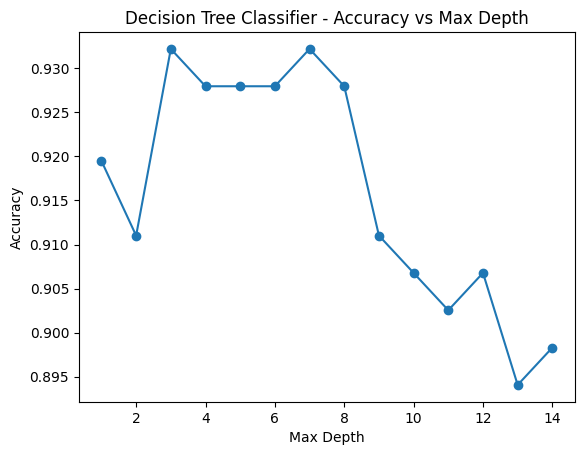

In [60]:
##visualization for Decision Tree Classifier
import matplotlib.pyplot as plt 
directory = 'models_visualization'
if not os.path.exists(directory):
    os.makedirs(directory)

score_list = []

for each in range(1, 15):
    dt_classifier = DecisionTreeClassifier(max_depth=each, random_state=42)
    dt_classifier.fit(x_train, y_train)
    dump(dt_classifier, 'models_visualization/dt.pkl')
    score_list.append(dt_classifier.score(x_test, y_test))

plt.plot(range(1, 15), score_list, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier - Accuracy vs Max Depth")
plt.show()

##RandomForestClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
dump(RF, 'models/RF.pkl')
y_pred_train = RF.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', train_score * 100)

Train accuracy: 100.0


In [81]:
y_pred = RF.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_score * 100)

Test accuracy: 94.49152542372882


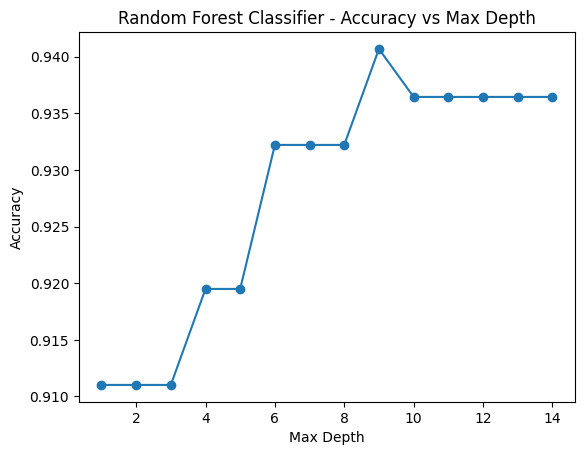

In [64]:
##visualization for random forest classifier
score_list = []

for each in range(1, 15):
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=each, random_state=42)
    rf_classifier.fit(x_train, y_train)
    dump(rf_classifier, 'models_visualization/RF.pkl')
    score_list.append(rf_classifier.score(x_test, y_test))

plt.plot(range(1, 15), score_list, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier - Accuracy vs Max Depth")
plt.show()

##KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
dump(knn, 'models/KNN.pkl')
y_pred_train = knn.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', train_score * 100)

Train accuracy: 93.85593220338984


In [85]:
y_pred = knn.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_score * 100)

Test accuracy: 94.0677966101695


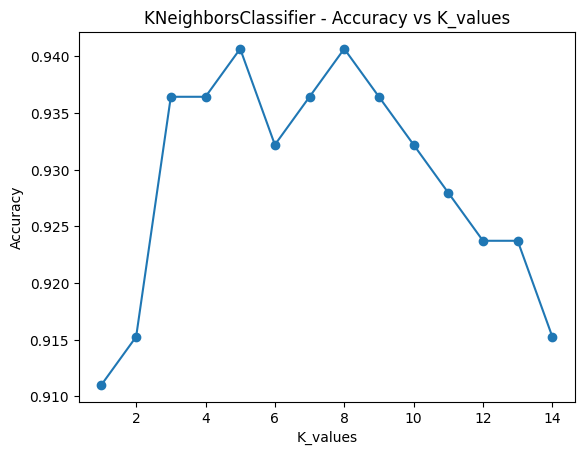

In [68]:
##visualization for KNN classifier
score_list=[]

for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    dump(knn2, 'models_visualization/KNN.pkl')
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list,marker='o')
plt.xlabel("K_values")
plt.ylabel("Accuracy")
plt.title("KNeighborsClassifier - Accuracy vs K_values")
plt.show()

##support vector machine classifier

In [87]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
dump(svm_classifier, 'models/SVM.pkl')
y_pred_train = svm_classifier.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', train_score * 100)

Train accuracy: 90.78389830508475


In [88]:
y_pred = svm_classifier.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_score * 100)

Test accuracy: 91.94915254237289


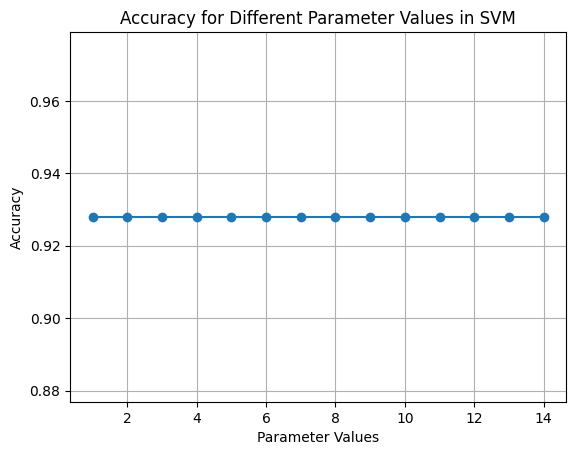

In [89]:
##visualization for SVM classifier
score_list = []

for each in range(1, 15):
    svm_classifier = SVC(C=each, kernel='linear') 
    svm_classifier.fit(x_train, y_train)
    dump(svm_classifier, 'models_visualization/SVM.pkl')
    score_list.append(svm_classifier.score(x_test, y_test))

plt.plot(range(1, 15), score_list, marker='o')
plt.xlabel("Parameter Values")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Parameter Values in SVM")
plt.grid(True)
plt.show()